In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
df = pd.read_csv("/content/creditcard.csv")

In [ ]:
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [ ]:
print(df.tail())

       Time        V1        V2        V3        V4        V5        V6  \
7968  10980  1.284388 -0.013181  0.646174  0.198985 -0.568675 -0.526121   
7969  10981  1.190428 -0.122329  0.954945  0.267101 -0.971026 -0.652279   
7970  10981 -0.725175  0.298202  1.824761 -2.587170  0.283605 -0.016617   
7971  10981  1.226153 -0.129645  0.735197  0.142752 -0.703245 -0.349641   
7972  10981  1.145381 -0.059349  0.968088  0.267891 -0.822582 -0.597727   

            V7        V8        V9  ...       V21       V22       V23  \
7968 -0.448235 -0.167709  1.773223  ... -0.101868 -0.030298 -0.081412   
7969 -0.612992 -0.003909  1.633117  ... -0.015001  0.127027  0.012079   
7970  0.153659  0.045084 -0.197611  ... -0.017097 -0.070535 -0.442861   
7971 -0.612641  0.020507  1.648986  ... -0.047936  0.040196 -0.057391   
7972 -0.450197 -0.119747  1.338188  ...       NaN       NaN       NaN   

           V24       V25       V26       V27       V28  Amount  Class  
7968 -0.123281  0.278808  1.064001 -0.

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7973 entries, 0 to 7972
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    7973 non-null   int64  
 1   V1      7973 non-null   float64
 2   V2      7973 non-null   float64
 3   V3      7973 non-null   float64
 4   V4      7973 non-null   float64
 5   V5      7973 non-null   float64
 6   V6      7973 non-null   float64
 7   V7      7973 non-null   float64
 8   V8      7973 non-null   float64
 9   V9      7973 non-null   float64
 10  V10     7973 non-null   float64
 11  V11     7973 non-null   float64
 12  V12     7973 non-null   float64
 13  V13     7973 non-null   float64
 14  V14     7973 non-null   float64
 15  V15     7972 non-null   float64
 16  V16     7972 non-null   float64
 17  V17     7972 non-null   float64
 18  V18     7972 non-null   float64
 19  V19     7972 non-null   float64
 20  V20     7972 non-null   float64
 21  V21     7972 non-null   float64
 22  

In [ ]:
print(df.describe())

               Time           V1           V2           V3           V4  \
count   7973.000000  7973.000000  7973.000000  7973.000000  7973.000000   
mean    4257.151261    -0.299740     0.295226     0.899355     0.215736   
std     3198.964299     1.498341     1.283914     1.090297     1.447057   
min        0.000000   -23.066842   -25.640527   -12.389545    -4.657545   
25%     1531.000000    -1.046362    -0.237359     0.372435    -0.687521   
50%     3635.000000    -0.416341     0.335446     0.948695     0.223379   
75%     6662.000000     1.122758     0.950582     1.597949     1.131542   
max    10981.000000     1.685314     8.261750     4.101716     7.380245   

                V5           V6           V7           V8           V9  ...  \
count  7973.000000  7973.000000  7973.000000  7973.000000  7973.000000  ...   
mean     -0.025285     0.157286    -0.026445    -0.070525     0.655244  ...   
std       1.167218     1.325015     1.063709     1.332568     1.156618  ...   
min     

In [ ]:
print(df.isna().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


In [ ]:
nan_indices = df[df.isnull().any(axis=1)].index
print("Indices with NaN values:", nan_indices)

Indices with NaN values: Index([7972], dtype='int64')


In [ ]:
df = df.drop(index=nan_indices)

In [ ]:
print(df['Class'].value_counts())

Class
0.0    7947
1.0      25
Name: count, dtype: int64


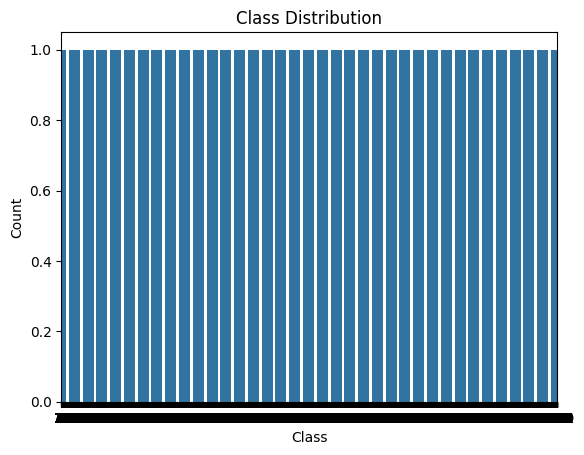

In [ ]:
sns.countplot(df['Class'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [ ]:
scaler = StandardScaler()
df['Normalized_Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df.drop(['Time', 'Amount'], axis=1, inplace=True)

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
oversampler = SMOTE(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_resampled, y_resampled)
lr_predictions = lr_model.predict(X_test)

In [ ]:
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_precision = precision_score(y_test, lr_predictions)
lr_recall = recall_score(y_test, lr_predictions)
lr_f1 = f1_score(y_test, lr_predictions)

In [ ]:
print("Logistic Regression Metrics:")
print("Accuracy:", lr_accuracy)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1 Score:", lr_f1)

Logistic Regression Metrics:
Accuracy: 0.9987460815047022
Precision: 0.6
Recall: 1.0
F1 Score: 0.7499999999999999


In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [ ]:
rf_predictions = rf_model.predict(X_test)

In [ ]:
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)

In [ ]:
print("\nRandom Forest Metrics:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)


Random Forest Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


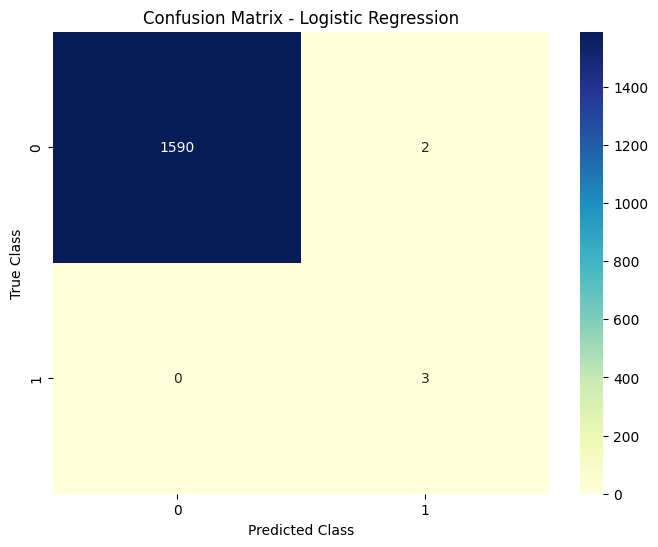

In [ ]:
# Confusion matrix for logistic regression
lr_cm = confusion_matrix(y_test, lr_predictions)
plt.figure(figsize=(8,6))
sns.heatmap(lr_cm, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

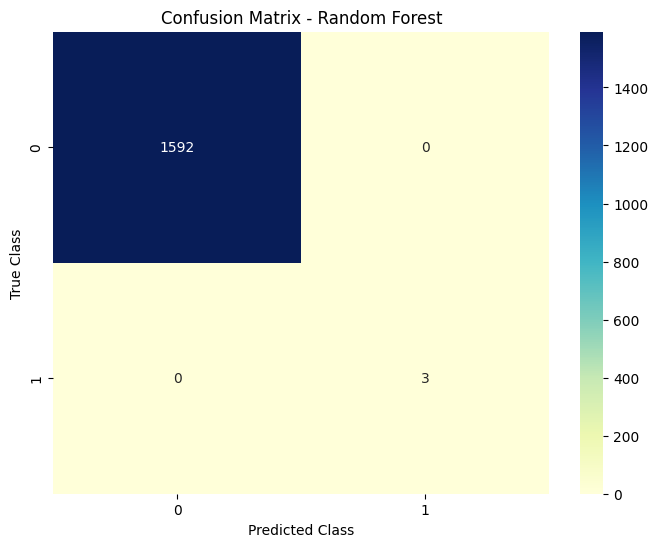

In [ ]:
# Confusion matrix for random forest
rf_cm = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(8,6))
sns.heatmap(rf_cm, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()